<a href="https://colab.research.google.com/github/soobin2121/ML_EDU/blob/master/Seoul_covid19_%EB%B6%84%EC%84%9D%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **서울시에서 공개한 코로나19 데이터 분석하기**
-서울시 코로나19 홈페이지
https://www.seoul.go.kr/coronaV/coronaStatus.do

###  1. 서울시 코로나19 홈페이지에서 데이터 크롤링 하기

- 데이터 가져와서 csv 파일로 저장하기

In [1]:
import pandas as pd

In [2]:
url='https://www.seoul.go.kr/coronaV/coronaStatus.do'

In [3]:
# list 형태로 데이터를 담아옴
pd.read_html(url)

[   종로구   중구  용산구  성동구  광진구  동대문구  중랑구  성북구  강북구  도봉구  노원구  은평구 서대문구
 0   60   48   99   86   88   113  136  270  105  124  197  172   88
 1  마포구  양천구  강서구  구로구  금천구  영등포구  동작구  관악구  서초구  강남구  송파구  강동구   기타
 2  128  138  204  148   71   134  156  232  136  172  250  139  279,
     종로구   중구  용산구  성동구  광진구 동대문구
 0    60   48   99   86   88  113
 1   중랑구  성북구  강북구  도봉구  노원구  은평구
 2   136  270  105  124  197  172
 3  서대문구  마포구  양천구  강서구  구로구  금천구
 4    88  128  138  204  148   71
 5  영등포구  동작구  관악구  서초구  강남구  송파구
 6   134  156  232  136  172  250
 7   강동구   기타  NaN  NaN  NaN  NaN
 8   139  279  NaN  NaN  NaN  NaN,
      소계  해외접촉관련  동작구신학교관련  광화문집회관련  ...  강동구어린이집  타 시·도확진자접촉자    기타  경로확인중
 0  3773     386        22       83  ...       17          143  1643    649
 
 [1 rows x 17 columns],
                                                    0
 0  < 신종 코로나바이러스 감염증 예방 국민 행동수칙 >○ 기침 등 호흡기 증상이 있을...,
                                                    0
 0  < 신종 코로나바이러스 감염증 예방 의료기관 행동수칙 >○ 호흡기 

In [4]:
# table 태그가 몇개인지 찾기
table=pd.read_html(url)
len(table)

8

In [5]:
table[2]

,소계,해외접촉관련,동작구신학교관련,광화문집회관련,성북구사랑제일교회,순복음강북교회,여의도순복음교회,성북구체대입시관련,구로구아파트관련,금천축산업계관련,용인시우리제일교회,노원구빛가온교회,극단'산'관련,강동구어린이집,타 시·도확진자접촉자,기타,경로확인중
0,3773,386,22,83,592,18,28,36,12,22,72,20,30,17,143,1643,649


In [6]:
# 행과 열 바꿔보기
table[2].T

,0
소계,3773
해외접촉관련,386
동작구신학교관련,22
광화문집회관련,83
성북구사랑제일교회,592
순복음강북교회,18
여의도순복음교회,28
성북구체대입시관련,36
구로구아파트관련,12
금천축산업계관련,22


In [7]:
df=table[6]
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,3773,19546,8.29.,기타,-,확인 중,NaN
1,3772,19533,8.29.,기타,-,확인 중,NaN
2,3771,19446,8.29.,기타,-,확인 중,NaN
3,3770,19484,8.29.,기타,-,확인 중,NaN
4,3769,19596,8.29.,기타,-,확인 중,NaN


In [8]:
# 0번 인덱스의 확진일만 가져오기
# 8.28. 을 8_28_로 바꾸기

last_day=df.loc[0,'확진일']
last_day=last_day.replace('.','_')

In [9]:
# 파일명 만들어 주기

file_name = f"seoul-covid19_{last_day}.csv"
file_name

'seoul-covid19_8_29_.csv'

In [10]:
# 인덱스는 생략하고 저장

df.to_csv(file_name, index= False)

In [11]:
pd.read_csv(file_name)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,3773,19546,8.29.,기타,-,확인 중,NaN
1,3772,19533,8.29.,기타,-,확인 중,NaN
2,3771,19446,8.29.,기타,-,확인 중,NaN
3,3770,19484,8.29.,기타,-,확인 중,NaN
4,3769,19596,8.29.,기타,-,확인 중,NaN
...,...,...,...,...,...,...,...
3768,5,9,1.31.,성북구,-,#5 접촉,퇴원
3769,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
3770,3,6,1.30.,종로구,-,#3 접촉,퇴원
3771,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원


####시각화 도구 불러오기( + 한글폰드)

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


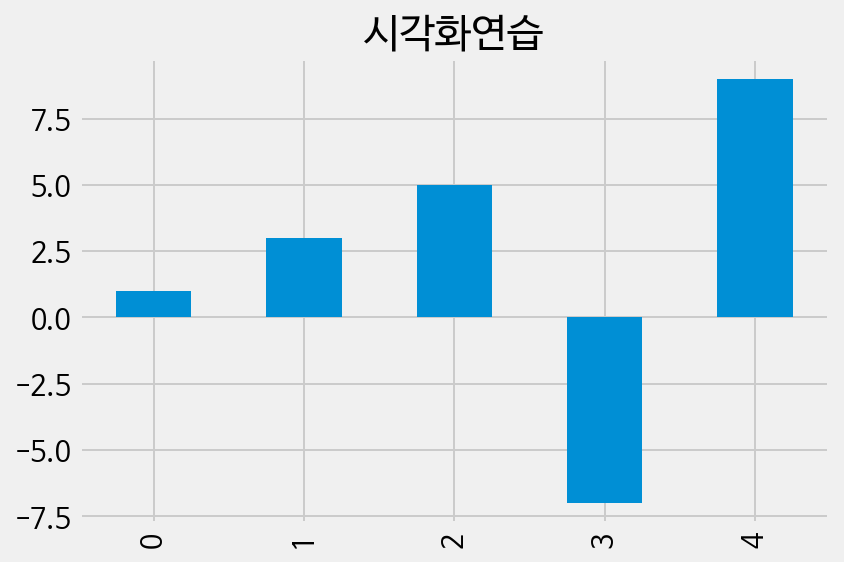

In [13]:
import matplotlib.pyplot as plt

plt.rc("font", family="NanumBarunGothic")
plt.rc("axes", unicode_minus=False)
plt.style.use("fivethirtyeight")

pd.Series([1,3,5,-7,9]).plot.bar(title='시각화연습')

### 2. 데이터 분석하기

#### 확진일

In [14]:
df['확진일'].value_counts()

8.26.    153
8.18.    151
8.15.    146
8.27.    146
8.22.    140
        ... 
2.6.       1
5.31.      1
2.7.       1
5.17.      1
4.15.      1
Name: 확진일, Length: 191, dtype: int64

In [15]:
# 확진일의 데이터가 날짜 형태가 아니라 문자형태이다.

df['확진일'].head(1)

0    8.29.
Name: 확진일, dtype: object

In [16]:
df['확진일자']=pd.to_datetime('2020-'+df['확진일'].str.replace('.','-'))
df[['확진일','확진일자']].head(3)

,확진일,확진일자
0,8.29.,2020-08-29
1,8.29.,2020-08-29
2,8.29.,2020-08-29


In [17]:
df['월']=df['확진일자'].dt.month
df[['확진일','확진일자','월']].head(3)

,확진일,확진일자,월
0,8.29.,2020-08-29,8
1,8.29.,2020-08-29,8
2,8.29.,2020-08-29,8


In [18]:
df['주']=df['확진일자'].dt.week
df[['확진일','확진일자','월','주']].head(3)

,확진일,확진일자,월,주
0,8.29.,2020-08-29,8,35
1,8.29.,2020-08-29,8,35
2,8.29.,2020-08-29,8,35


#### 선그래프 그리기

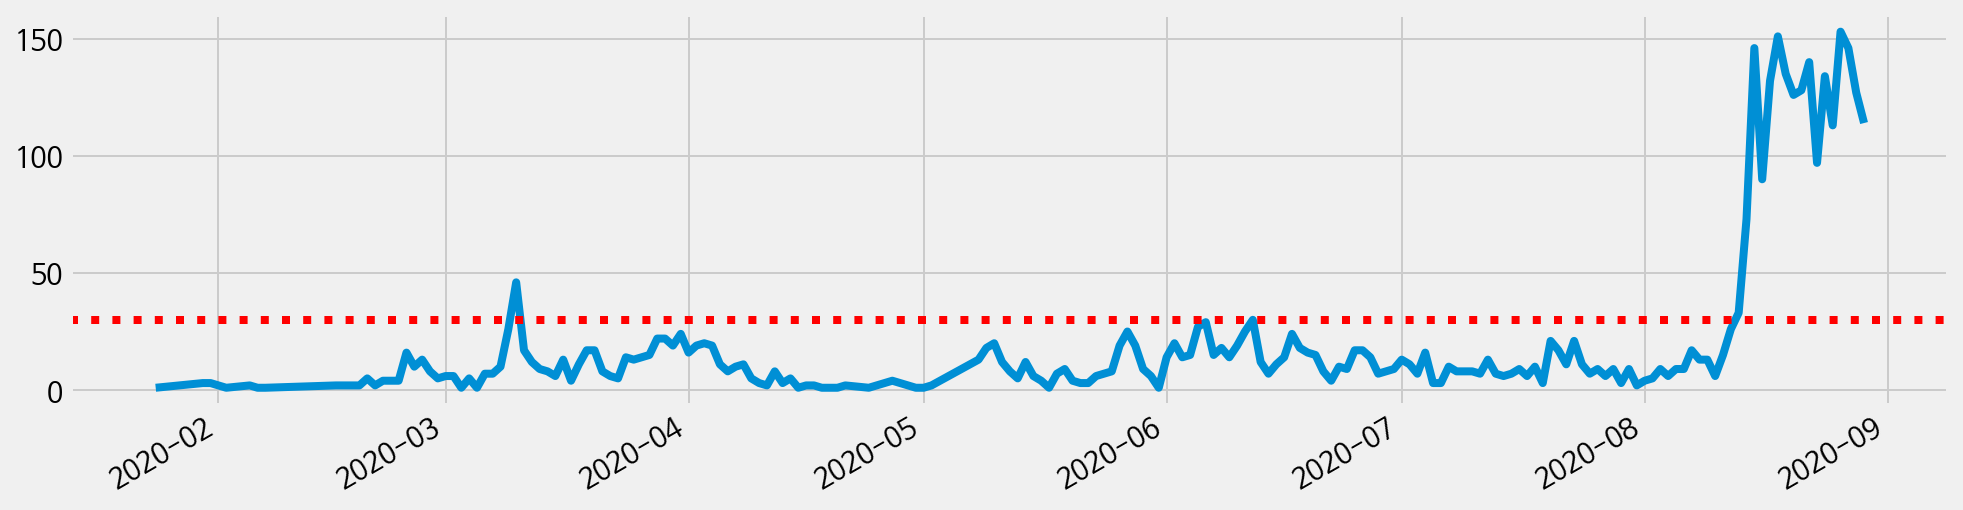

In [19]:
df['확진일자'].value_counts().sort_index().plot(figsize=(15,4))
plt.axhline(30, color='red', linestyle=':')

#### 선그래프에 값 표시하기 

In [20]:
df['월일']=df['확진일자'].astype(str).map(lambda x : x[-5:])
day_count = df['월일'].value_counts().sort_index()
day_count

01-24      1
01-30      3
01-31      3
02-02      1
02-05      2
        ... 
08-25    113
08-26    153
08-27    146
08-28    127
08-29    114
Name: 월일, Length: 190, dtype: int64

In [21]:
for i in range(len(day_count)):
  case_count = day_count.iloc[i]
  if case_count > 20:
    print(i, case_count)

27 26
28 46
46 22
47 22
49 24
95 25
104 27
105 29
110 25
111 30
116 24
149 21
152 21
172 26
173 33
174 73
175 146
176 90
177 132
178 151
179 135
180 126
181 128
182 140
183 97
184 134
185 113
186 153
187 146
188 127
189 114


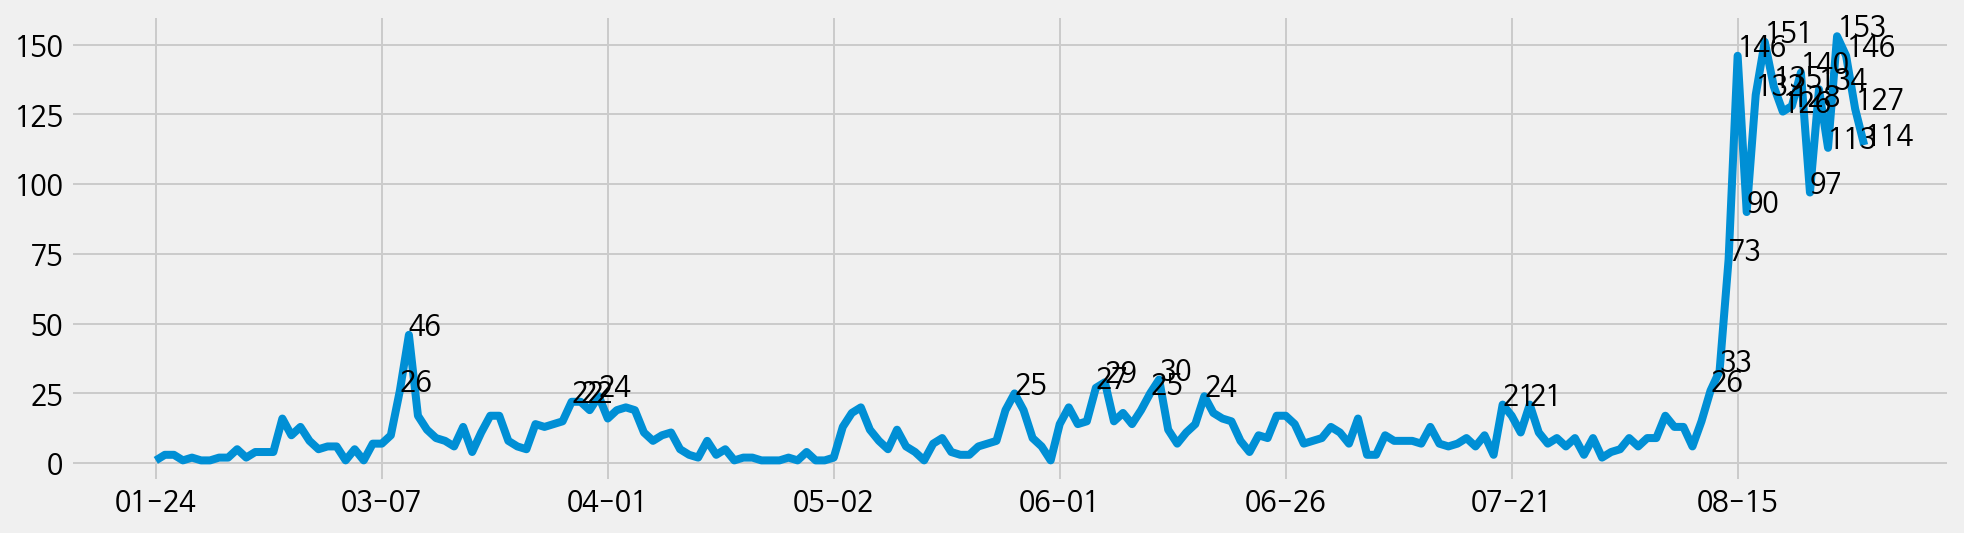

In [22]:
g= day_count.plot(figsize=(15,4))
for i in range(len(day_count)):
  case_count=day_count.iloc[i]
  if case_count > 20:
    g.text(x=i, y=case_count, s=case_count)

#### 확진자가 가장 많이 나온 날

In [23]:
day_count[day_count==day_count.max()]

08-26    153
Name: 월일, dtype: int64

In [24]:
df[df['월일']=='08-26'].head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
387,3386,18601,8.26.,노원구,-,광화문집회 관련,NaN,2020-08-26,8,35,08-26
388,3385,18575,8.26.,성북구,-,확인 중,NaN,2020-08-26,8,35,08-26
389,3384,18573,8.26.,기타,-,확인 중,NaN,2020-08-26,8,35,08-26
390,3383,18572,8.26.,노원구,-,확인 중,NaN,2020-08-26,8,35,08-26
391,3382,18568,8.26.,노원구,-,광화문집회 관련,NaN,2020-08-26,8,35,08-26


#### 막대그래프 그리기

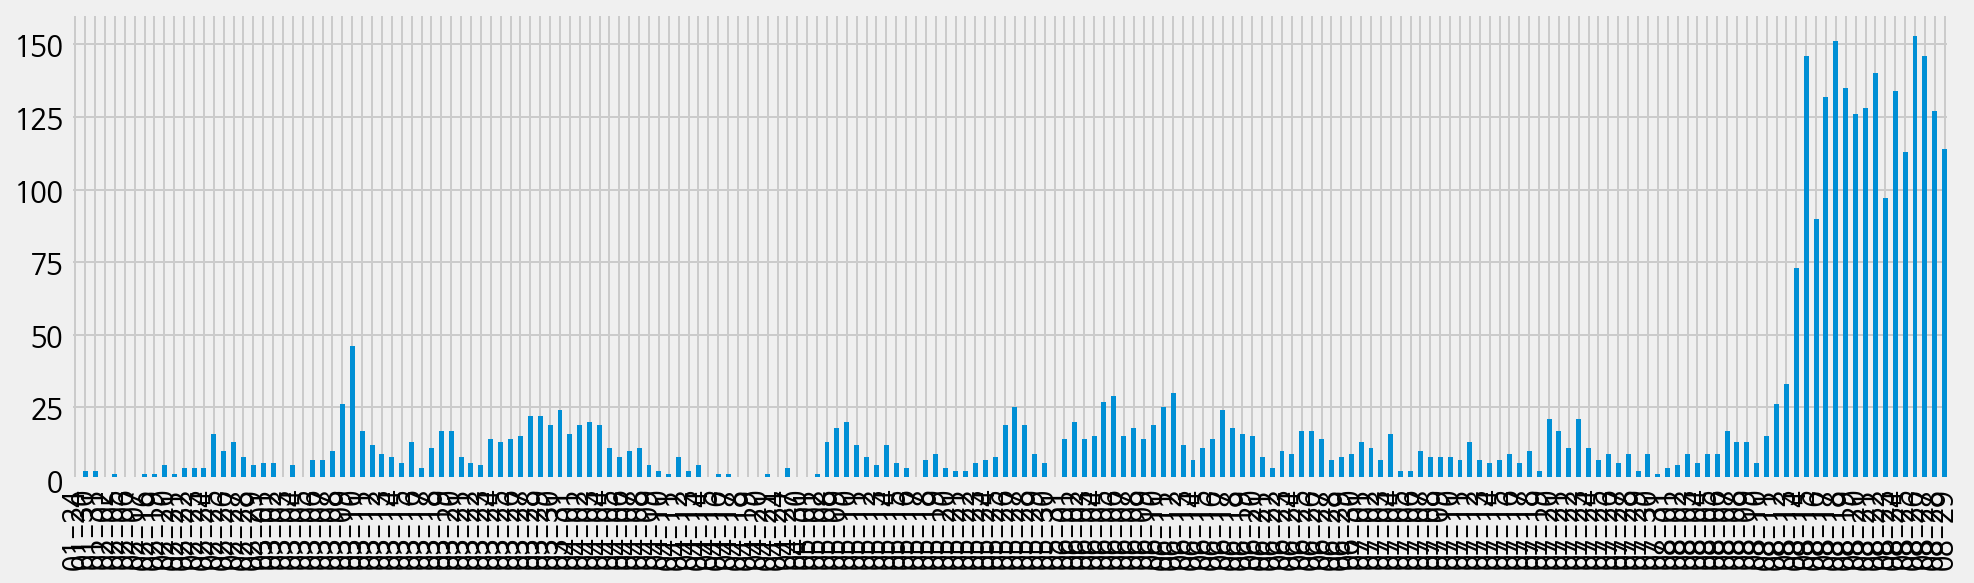

In [25]:
day_count.plot.bar(figsize=(15,4))

#### 최근 데이터만 슬라이싱 해서 그리기

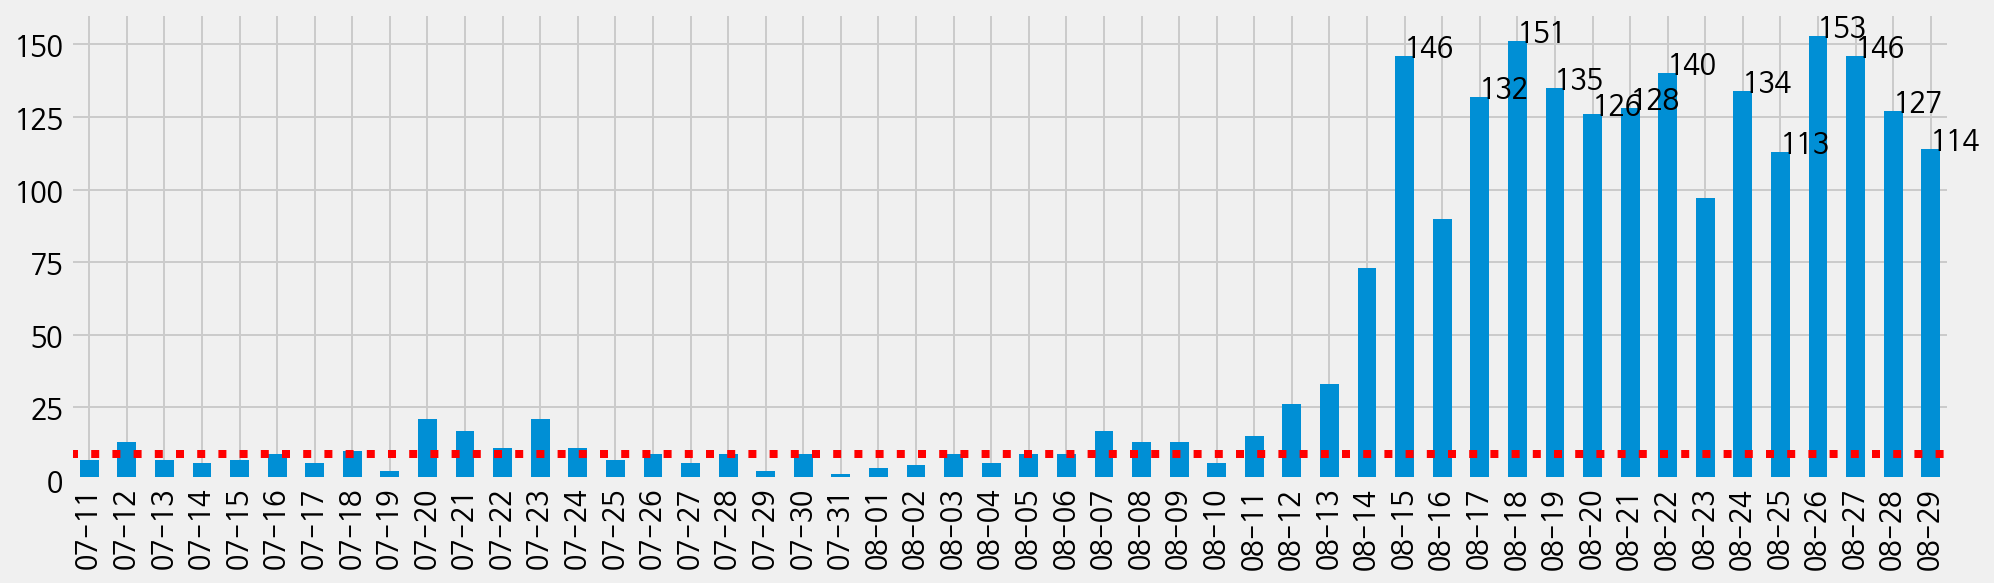

In [26]:
g= day_count[-50:].plot.bar(figsize=(15,4))
g.axhline(day_count.median(),linestyle=':', color= 'red')

for i in range(50):
  case_count = day_count[-50:].iloc[i]
  if case_count>100:
    g.text(x=i, y=case_count, s=case_count)

#### 월별 확진자 수 그리기

In [27]:
month_case= df['월'].value_counts().sort_index()
month_case

1       7
2      80
3     391
4     156
5     228
6     460
7     281
8    2170
Name: 월, dtype: int64

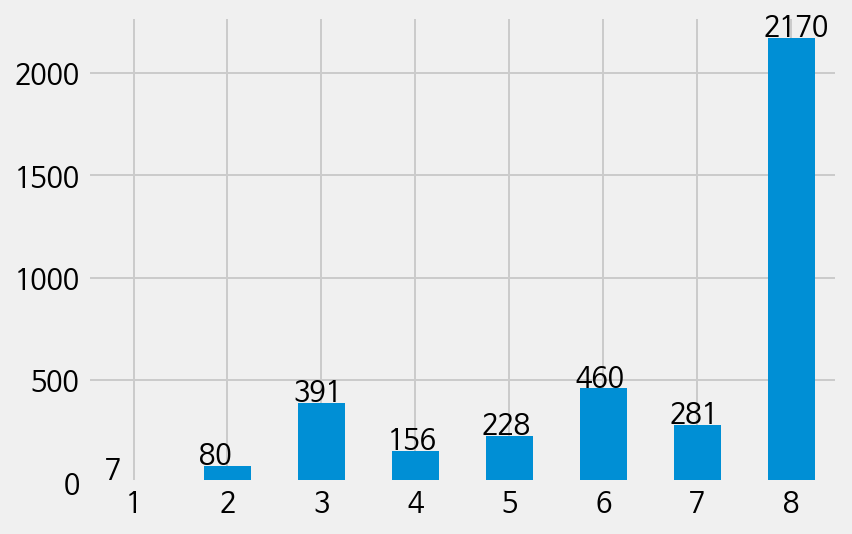

In [28]:
month_case= df['월'].value_counts().sort_index()
g= month_case.plot.bar(rot=0)


# -와 +로 텍스트 위치 조율하기 

for i in range(len(month_case)):
  g.text(x=i-0.3, y=month_case.iloc[i]+10, s=month_case.iloc[i])

#### 주단위 확진자 수 그리기

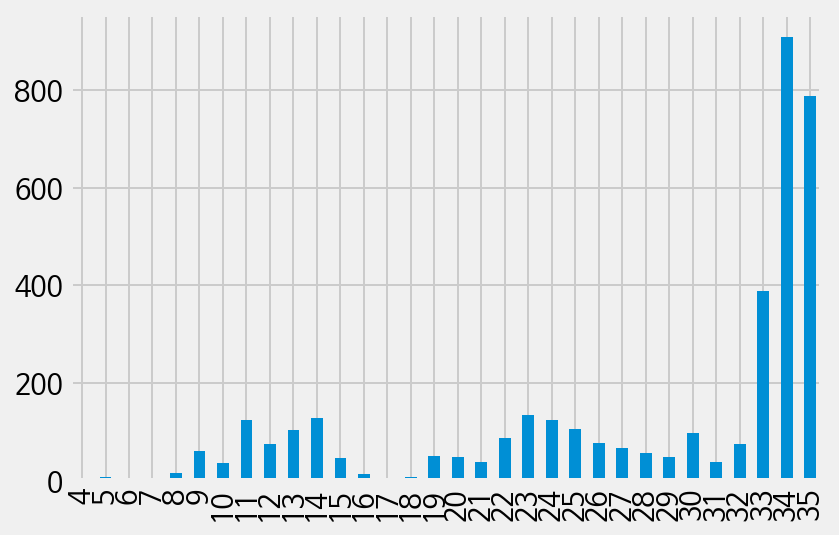

In [29]:
weekly_case= df['주'].value_counts().sort_index()
weekly_case.plot.bar()

#### 월, 주 함께 그리기

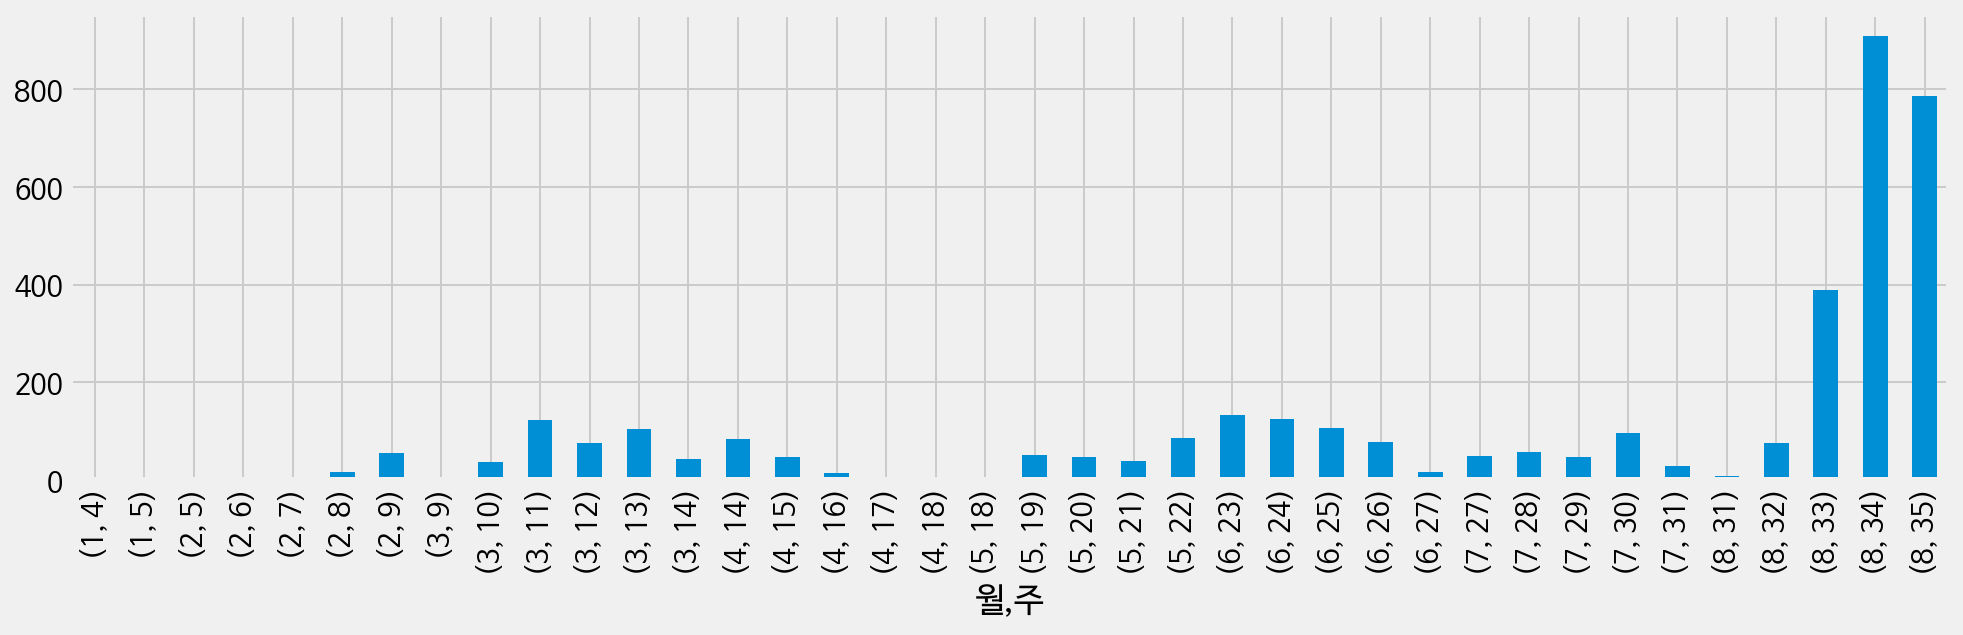

In [30]:
month_week_case= df.groupby(['월','주'])['연번'].count()
month_week_case.plot.bar(figsize=(15,4))

#### 모든 날짜를 행에 만들어 주기
- 확진자가 없는 날의 데이터도 만들어 줍니다

In [31]:
# 처음과 끝을 설정

a= df.iloc[-1,7]
b= df.iloc[0,7]

In [32]:
# 처음과 끝을 설정한 후 데이터프레임화 시킴

days= pd.date_range(a,b)
df_days= pd.DataFrame({'확진일자':days})
df_days

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28
...,...
214,2020-08-25
215,2020-08-26
216,2020-08-27
217,2020-08-28


In [33]:
# 각 날짜에 해당하는 숫자를 총합하여 새로운 데이터프레임을 만들었음

daily_case= df['확진일자'].value_counts()

df_daily_case= daily_case.to_frame()
df_daily_case.columns=['확진자수']

In [34]:
all_day = df_days.merge(df_daily_case, left_on='확진일자', right_on= df_daily_case.index, how='left')
all_day

,확진일자,확진자수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN
...,...,...
214,2020-08-25,113.0
215,2020-08-26,153.0
216,2020-08-27,146.0
217,2020-08-28,127.0


#### 누적 확진자 수 구하기

In [35]:
#결측치는 0으로 채우고, 누적합 구하기

all_day['누적확진']=all_day['확진자수'].fillna(0).cumsum()
all_day

,확진일자,확진자수,누적확진
0,2020-01-24,1.0,1.0
1,2020-01-25,NaN,1.0
2,2020-01-26,NaN,1.0
3,2020-01-27,NaN,1.0
4,2020-01-28,NaN,1.0
...,...,...,...
214,2020-08-25,113.0,3233.0
215,2020-08-26,153.0,3386.0
216,2020-08-27,146.0,3532.0
217,2020-08-28,127.0,3659.0


In [36]:
all_day['일자']=all_day['확진일자'].astype(str).map(lambda x: x[-5:])
all_day.head()

,확진일자,확진자수,누적확진,일자
0,2020-01-24,1.0,1.0,01-24
1,2020-01-25,NaN,1.0,01-25
2,2020-01-26,NaN,1.0,01-26
3,2020-01-27,NaN,1.0,01-27
4,2020-01-28,NaN,1.0,01-28


In [37]:
cum_day= all_day[['일자','확진자수','누적확진']]
cum_day= cum_day.set_index('일자')
cum_day

,확진자수,누적확진
일자,,
01-24,1.0,1.0
01-25,NaN,1.0
01-26,NaN,1.0
01-27,NaN,1.0
01-28,NaN,1.0
...,...,...
08-25,113.0,3233.0
08-26,153.0,3386.0
08-27,146.0,3532.0


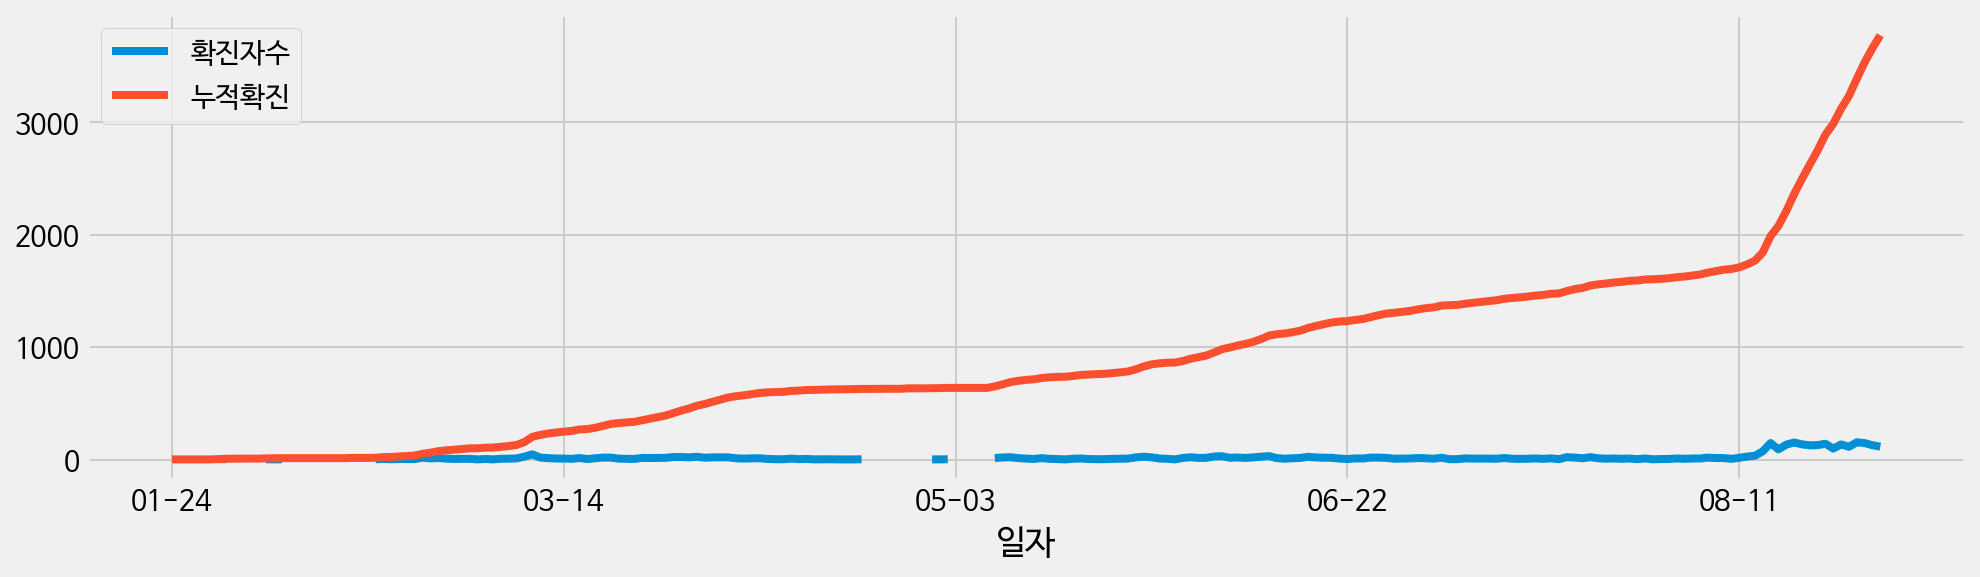

In [38]:
cum_day.plot(figsize=(15,4))

#### 로그 스케일
- 차이가 너무 커서 그래프가 자세히 보이지 않을 때, 로그스케일로 표혆면 차이가 큰 값의 스케일을 조정해주게 된다.

In [41]:
import numpy as np

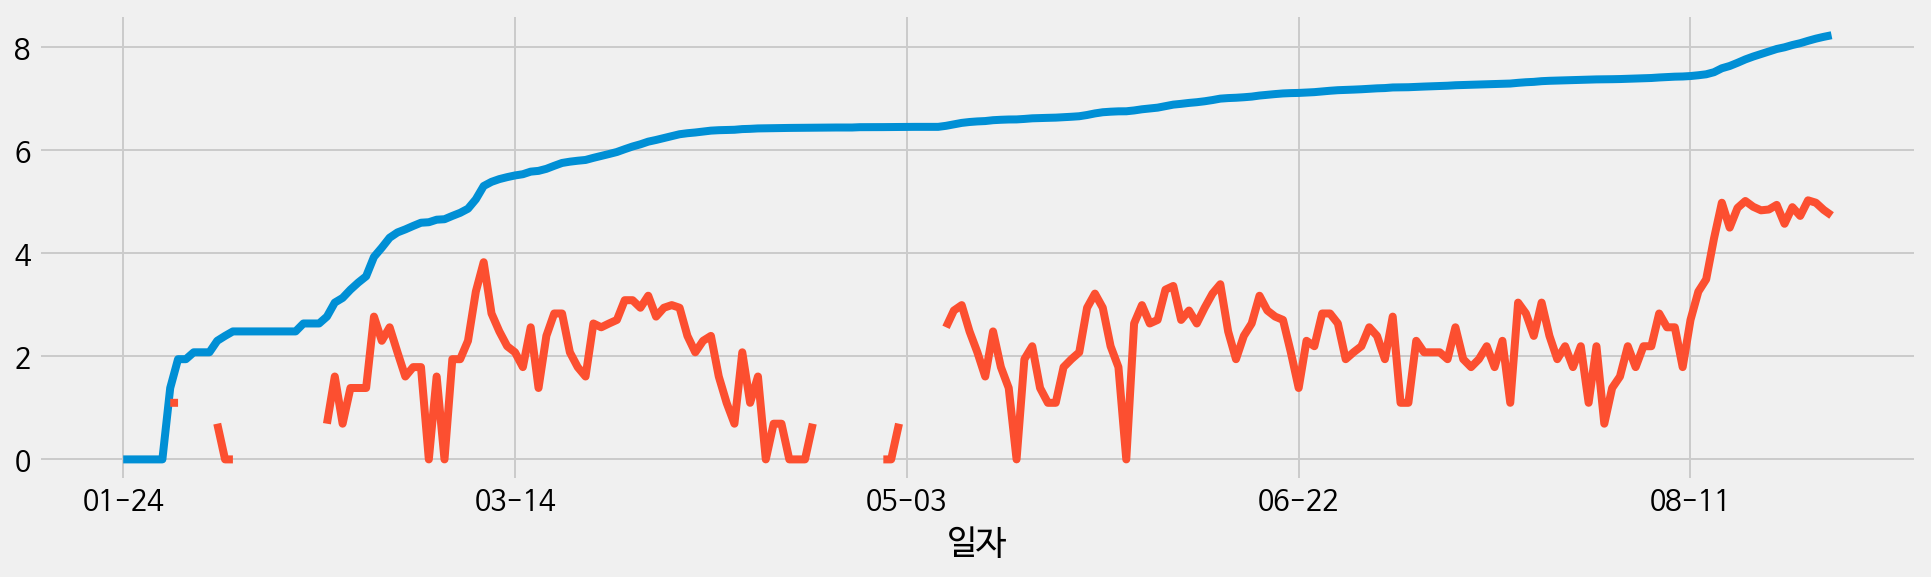

In [42]:
np.log(cum_day['누적확진']).plot(figsize=(15,4))
np.log(cum_day['확진자수']).plot()

#### 확진 월과 요일 구하기

In [43]:
all_day['확진월']= all_day['확진일자'].dt.month
all_day['확진요일']= all_day['확진일자'].dt.dayofweek
all_day.head()

,확진일자,확진자수,누적확진,일자,확진월,확진요일
0,2020-01-24,1.0,1.0,01-24,1,4
1,2020-01-25,NaN,1.0,01-25,1,5
2,2020-01-26,NaN,1.0,01-26,1,6
3,2020-01-27,NaN,1.0,01-27,1,0
4,2020-01-28,NaN,1.0,01-28,1,1


In [ ]:
all_day_week= all_day.groupby(['확진월','확진요일'])['확진자수'].sum()
all_day_week= all_day_week.unstack().astype(str)
all_day_week

In [ ]:
dayofweek='월 화 수 목 금 토 일'
dayofweek= dayofweek.split()
all_day_week.columns=dayofweek
all_day_week

In [57]:
all_day_week.style.background_gradient(cmap='Blues')

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0.0,0.0,0.0,3.0,4.0,0.0,0.0
2,4.0,16.0,14.0,19.0,11.0,9.0,7.0
3,69.0,89.0,46.0,44.0,48.0,45.0,50.0
4,16.0,17.0,28.0,27.0,26.0,22.0,20.0
5,27.0,36.0,34.0,34.0,32.0,36.0,29.0
6,55.0,67.0,66.0,75.0,90.0,70.0,37.0
7,37.0,42.0,42.0,58.0,34.0,40.0,28.0
8,281.0,285.0,323.0,314.0,345.0,417.0,205.0


#### 거주지별 확진자

In [ ]:
gu_count= df['거주지'].value_counts()
gu_count.sort_values().plot.barh(figsize=(10,12))

In [ ]:
# 서울만 추출

gu=gu_count[:25].index
gu

In [ ]:
# 서울이 아닌 곳만 따로 추출

set(gu_count.index) - set(gu)

In [73]:
gu_count.head()

성북구    272
송파구    251
관악구    233
강서구    205
노원구    200
Name: 거주지, dtype: int64

In [ ]:
# 구를 전처리 하기 쉽게 컬럼으로 변환하기 위한 작업

df_gu= gu_count.reset_index()
df_gu.columns= ['구','확진수']
df_gu.head()

In [80]:
# .loc[행인덱스]
# .loc[행,열]
# .loc[조건, 열]

# 거주지 안에서 gu에 해당하는 데이터는 지역이라는 새로운 컬럼에 넣기
df.loc[df['거주지'].isin(gu), '지역']

# 지역에서 결측치는 타지역으로 분류
df['지역']= df['지역'].fillna('타지역')
df['지역'].unique()

array(['기타', '영등포구', '송파구', '강동구', '관악구', '구로구', '동작구', '중랑구', '성북구',
       '종로구', '서대문구', '강북구', '타지역', '동대문구', '도봉구', '금천구', '서초구', '광진구',
       '강남구', '은평구', '양천구', '마포구', '강서구', '노원구', '용산구', '성동구'],
      dtype=object)

In [ ]:
df['지역']= df['거주지'].map(lambda x: x if x in gu else '타지역')
df[['지역','거주지']].tail()

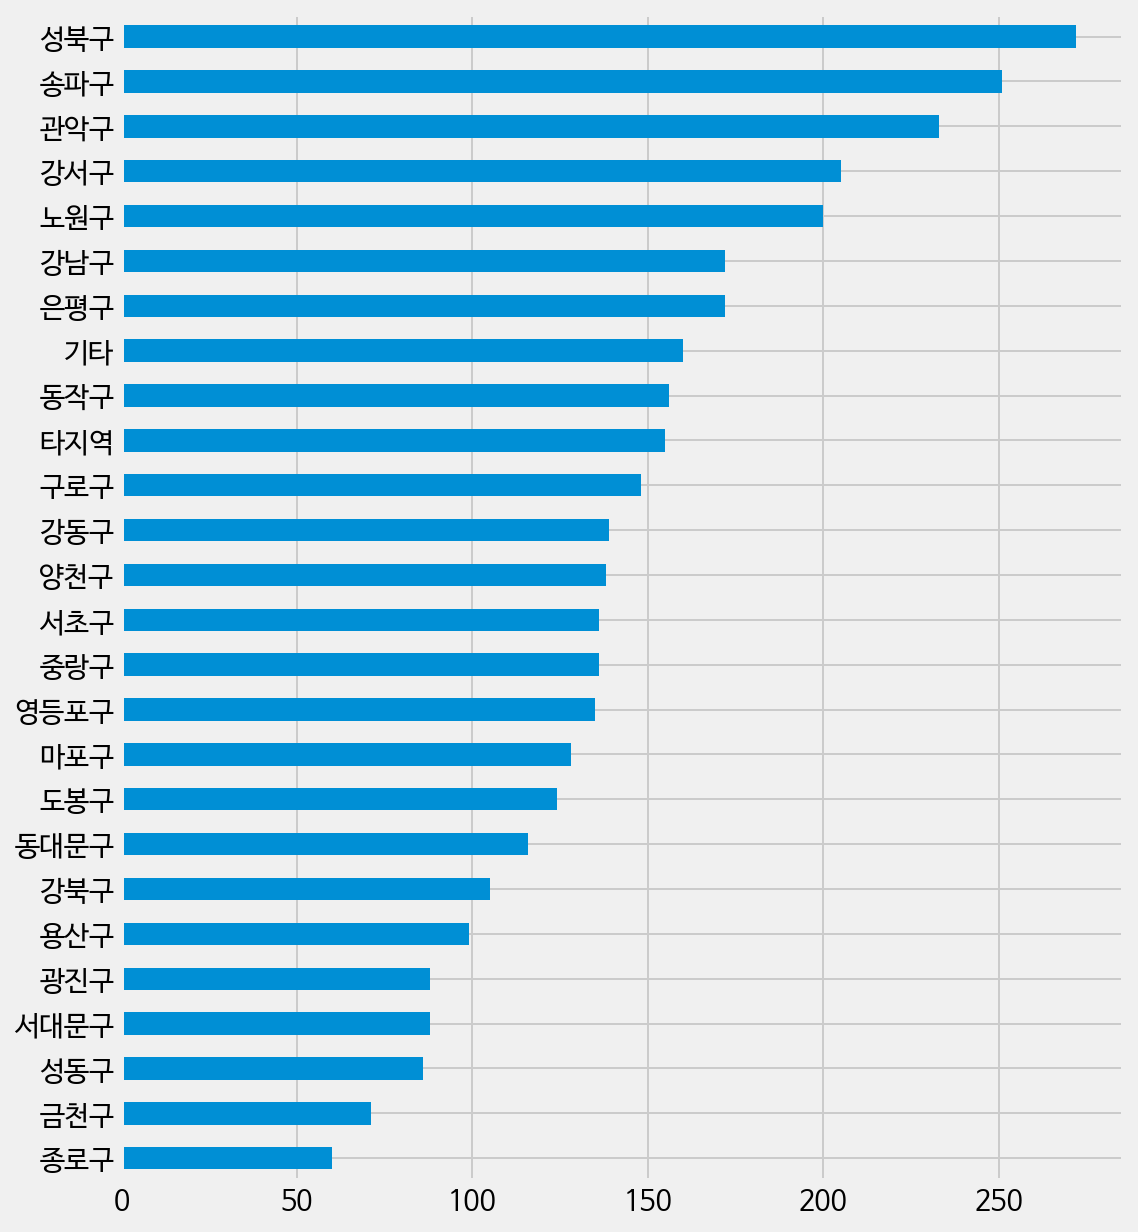

In [87]:
gu_etc_count= df['지역'].value_counts()
gu_etc_count.sort_values().plot.barh(figsize=(8,10))

#### 접촉력

In [ ]:
df['접촉력'].unique()

In [94]:
# df.loc[조건, 열]

df.loc[df['접촉력'].str.contains('확인'), '접촉력']='확인 중'

In [99]:
contact_count= df['접촉력'].value_counts()
contact_count_top=contact_count.sort_values().tail(30)
top_contact= contact_count_top.tail(15)

In [ ]:
# 위에서 구한 top_contact 에만 해당하는 데이터만 isin으로 가져오기
# top_contact에 해당하는 index가 포함된 데이터

top_group= df[df['접촉력'].isin(top_contact.index)]
top_group

In [ ]:
top_group.groupby(['접촉력','월'])['연번'].count().unstack().fillna(0).astype(str)

In [ ]:
# 이태원 클럽 관련만 찾아보기

df[df['접촉력'].str.contains('이태원') & (df['월']==6) ]

#### 가장 전파가 많이 일어난 번호

In [114]:
import re

# 숫자외의 데이터는 제거하는 정규표현식

In [115]:
# 함수를 통해 숫자외의 문자를 제거하는 get_number 함수 만들기

def get_number(text):
  return re.sub("[^0-9]", "", text)
  

<function __main__.get_number>

In [128]:
df['접촉번호']= df['접촉력'].map(get_number)

contact= df['접촉번호'].value_counts().reset_index()

In [131]:
#0번 인덱스는 접촉자가 없어서 삭제함
df_contact= contact.drop(0)

df_contact= df_contact.head(10)

# 상위 10개의 접촉번호를 구해서, 새로운 변수에 할당
top_contact_no= df_contact['index']

In [132]:
df[df['접촉번호'].isin(top_contact_no)]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호
2119,1654,14532,8.7.,경기광주,-,#14483 접촉,퇴원,2020-08-07,8,32,08-07,타지역,14483
2120,1653,14542,8.7.,경기광주,-,#14483 접촉,퇴원,2020-08-07,8,32,08-07,타지역,14483
2128,1645,14518,8.6.,하남,-,#14483 접촉,NaN,2020-08-06,8,32,08-06,타지역,14483
3282,491,10021,4.01.,영등포구,-,#8271 접촉,퇴원,2020-04-01,4,14,04-01,영등포구,8271
3300,473,9870,3.31.,안양시,-,#9734 접촉,사망,2020-03-31,3,14,03-31,타지역,9734
3301,472,9800,3.31.,중구,-,#9734 접촉,퇴원,2020-03-31,3,14,03-31,타지역,9734
3326,447,9725,3.30.,중구,-,#9734 접촉,퇴원,2020-03-30,3,14,03-30,타지역,9734
3331,442,9706,3.30.,서초구,-,#9734 접촉,퇴원,2020-03-30,3,14,03-30,서초구,9734
3392,381,9427,3.27.,중랑구,-,#8791 접촉,퇴원,2020-03-27,3,13,03-27,중랑구,8791
3432,341,9135,3.24.,강서구,-,#8245 접촉,퇴원,2020-03-24,3,13,03-24,강서구,8245
